# Load Synthetic Training Dataet.

len =  1600
(1600, 1, 128, 128)


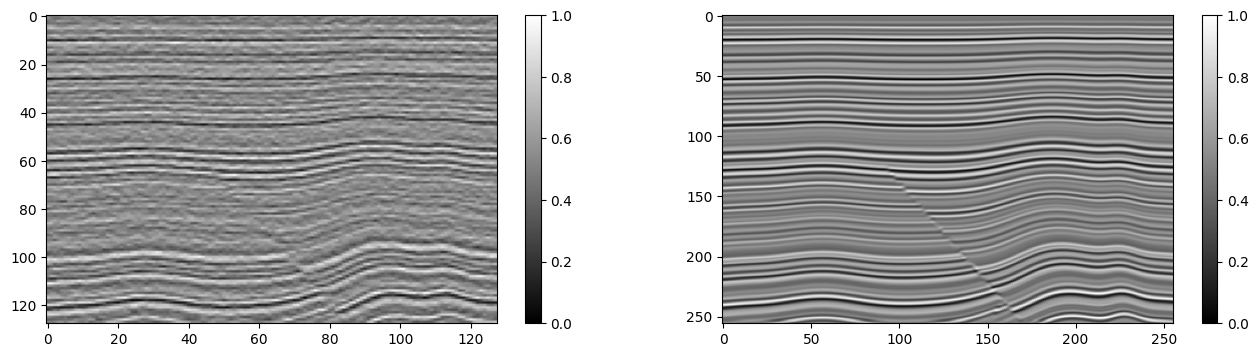

In [1]:
import matplotlib.pyplot as plt
import numpy
import glob
import numpy as np
import torch
from collections import OrderedDict

# Loading the Training Data.
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_HR/*')
pain = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_LR_bicubic/X2/*')#
print('len = ',len(palab))
datin = []
datlab = []

for k in range(len(palab)):

    sampleNO = palab[k].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/dataset/DF2K_decoded/DIV2K_train_LR_bicubic/X2/' + str(sampleNO)
    datin.append(np.load(pain))
    datlab.append(np.load(palab[k]))

datin = np.array(datin)   # Input data.
datlab = np.array(datlab) # Label data.
print(datin.shape)

# Plotting Example for the Input and Label.
k = 10
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.subplot(1,2,2),plt.imshow(datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.show() 

len =  100
/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation/image_SRF_2/2657.npy
(100, 1, 128, 128)


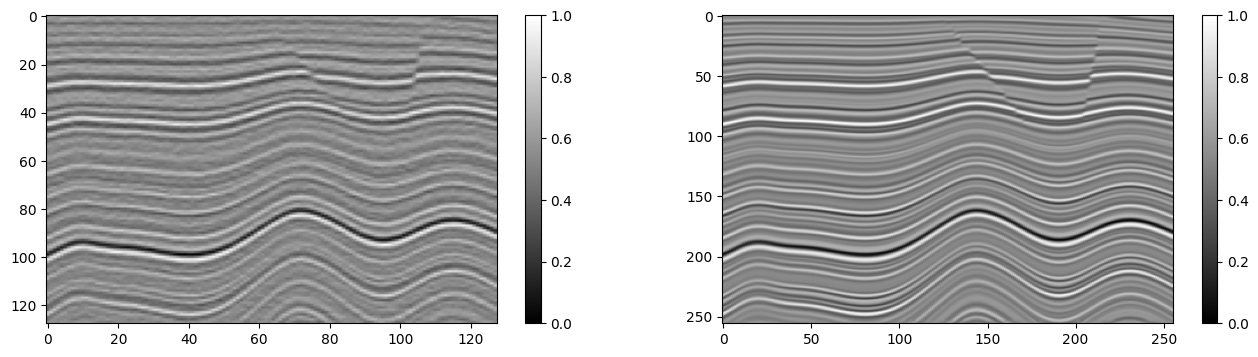

In [2]:
# Loading the Validation Data.
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation/image_SRF_2/*')

print('len = ',len(palab))
val_datin = []
val_datlab = []
print(palab[1])
for k in range(len(palab)):

    sampleNO = palab[k].split('/')[-1]
    #print(sampleNO)
    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/validation_LR/x2/' + str(sampleNO)
    val_datin.append(np.load(pain))
    val_datlab.append(np.load(palab[k]))

val_datin = np.array(val_datin)   # Input data.
val_datlab = np.array(val_datlab) # Label data.
print(val_datin.shape)

# Plotting Example for the Input and Label.
k = 10
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(val_datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.subplot(1,2,2),plt.imshow(val_datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.show() 

In [3]:
def FFT_Loss(seismic_image_data, seismic_image_data2):
    # seismic_image_data = seismic_image_data.detach().cpu().numpy()
    # seismic_image_data2 = seismic_image_data2.detach().cpu().numpy()
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1

    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)

    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]
    sampling_rate = 0.002  # You may adjust this depending on your actual data(dt)
    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

    # Sample 2D seismic image data (replace this with your actual image data)

    # 최대값과 최소값 찾기
    max_value2 = np.max(seismic_image_data2)
    min_value2 = np.min(seismic_image_data2)
    # # 정규화
    seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

    # Calculate the amplitude for each frequency
    amplitude2 = np.abs(frequency_domain_data2)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude2 = np.mean(amplitude2, axis=0)

    # Create x-axis with frequency values
    num_cols2 = seismic_image_data2.shape[1]
    sampling_rate2 = 0.002  # You may adjust this depending on your actual data(dt)
    freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)
    input_half = seismic_image_data.shape[1]//2
    loss = np.abs((average_amplitude[:input_half]-average_amplitude2[:input_half])/average_amplitude2[:input_half])
    # loss = np.abs((average_amplitude[:input_half]-average_amplitude2[:input_half]))
    loss_avg = np.mean(loss)
    return loss_avg



In [4]:
def FFT_Loss(seismic_image_data, seismic_image_data2):
    seismic_image_data = seismic_image_data.detach().cpu().numpy()
    seismic_image_data2 = seismic_image_data2.detach().cpu().numpy()
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1

    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)

    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]
    sampling_rate = 0.001  # You may adjust this depending on your actual data(dt)
    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)

    # Sample 2D seismic image data (replace this with your actual image data)

    # 최대값과 최소값 찾기
    max_value2 = np.max(seismic_image_data2)
    min_value2 = np.min(seismic_image_data2)
    # # 정규화
    seismic_image_data2 = (seismic_image_data2 - min_value2) / (max_value2 - min_value2) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data2 = np.fft.fft2(seismic_image_data2)

    # Calculate the amplitude for each frequency
    amplitude2 = np.abs(frequency_domain_data2)

    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude2 = np.mean(amplitude2, axis=0)

    # Create x-axis with frequency values
    num_cols2 = seismic_image_data2.shape[1]
    sampling_rate2 = 0.001  # You may adjust this depending on your actual data(dt)
    freq_values2 = np.fft.fftfreq(num_cols2, d=sampling_rate2)
    loss = np.abs((average_amplitude[:128]-average_amplitude2[:128])/average_amplitude2[:128])
    loss_avg = np.mean(loss)
    return loss_avg

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def FFT(seismic_image_data, sampling_rate=0.002):
    # Sample 2D seismic image data (replace this with your actual image data)
    #seismic_image_data = np.fromfile('/home/parkj0e/KAUST/ESRT/Test_Datasets/Unet_synthetic/2886_256x256.dat',dtype='float32').reshape(256,-1)
    seismic_image_data = seismic_image_data.T
    # 최대값과 최소값 찾기
    max_value = np.max(seismic_image_data)
    min_value = np.min(seismic_image_data)
    # print(max_value, min_value)
    # # 정규화
    seismic_image_data = (seismic_image_data - min_value) / (max_value - min_value) * 2 - 1


    # Perform 2D Discrete Fourier Transform
    frequency_domain_data = np.fft.fft2(seismic_image_data)
    print('frequency_domain_data_shape : ', frequency_domain_data.shape)

    # Calculate the amplitude for each frequency
    amplitude = np.abs(frequency_domain_data)
    print('frequency_domain_amplitude_shape : ', amplitude.shape, amplitude)
    # Calculate the average amplitude along the frequency axis (axis=0)
    average_amplitude = np.mean(amplitude, axis=0)
    print('frequency_domain_average_amplitude_shape : ', average_amplitude.shape, average_amplitude)
    # Create x-axis with frequency values
    num_cols = seismic_image_data.shape[1]

    freq_values = np.fft.fftfreq(num_cols, d=sampling_rate)
    print('freq_values : ', freq_values.shape, freq_values)



    input_half = seismic_image_data.shape[1]//2
    return freq_values, average_amplitude, input_half



In [6]:
from util import utils
from collections import OrderedDict
from scipy.ndimage import zoom

def min_max_scaling(new, data):
    original_min = np.min(data)
    original_max = np.max(data)
    new_max = np.max(new)
    new_min = np.min(new)
    scaled_data = (data - original_min) / (original_max - original_min) * (new_max - new_min) + new_min
    return scaled_data

def yc_patch(A,l1,l2,o1,o2):
    #A = zoom(A, 2, order=5)
    n1,n2=np.shape(A);
    tmp=np.mod(n1-l1,o1)
    if tmp!=0:
        #print(np.shape(A), o1-tmp, n2)
        A=np.concatenate([A,np.zeros((o1-tmp,n2))],axis=0)

    tmp=np.mod(n2-l2,o2);
    if tmp!=0:
        A=np.concatenate([A,np.zeros((A.shape[0],o2-tmp))],axis=-1); 


    N1,N2 = np.shape(A)
    X=[]
    for i1 in range (0,N1-l1+1, o1):
        for i2 in range (0,N2-l2+1,o2):
            tmp=np.reshape(A[i1:i1+l1,i2:i2+l2],(l1*l2,1));
            X.append(tmp);  
    X = np.array(X)
    return X[:,:,0]

def Normalization(x):
    max_x = x.max()
    min_x = x.min()
    norm_out = (x-min_x)/(max_x-min_x)
    return norm_out

def DeNorm(x, norm_x):
    max_x = x.max()
    min_x = x.min()
    denorm = norm_x*(max_x-min_x)+min_x
    return denorm

def normalize_to_minus_one_one(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = -1 + 2 * ((data - min_val) / (max_val - min_val))
    return normalized_data

def denormalize_minmax(normalized_array, min_value, max_value):
    denormalized_array = normalized_array * (max_value - min_value) + min_value
    return denormalized_array

def denormalize(original_array, normalized_array):
    """
    정규화된 배열을 다시 원래의 범위로 되돌리는 함수
    """
    min_val = original_array.min()
    max_val = original_array.max()
    mean_val = original_array.mean()
    std_val = original_array.std()
    
    denormalized_array = normalized_array * (max_val - min_val) + min_val
    denormalized_array = denormalized_array * std_val + mean_val
    return denormalized_array

def yc_patch_inv(X1,n1,n2,l1,l2,o1,o2):
    
    
    
    tmp1=np.mod(n1-l1,o1)
    tmp2=np.mod(n2-l2,o2)
    if (tmp1!=0) and (tmp2!=0):
        A     = np.zeros((n1+o1-tmp1,n2+o2-tmp2))
        mask  = np.zeros((n1+o1-tmp1,n2+o2-tmp2)) 

    if (tmp1!=0) and (tmp2==0): 
        A   = np.zeros((n1+o1-tmp1,n2))
        mask= np.zeros((n1+o1-tmp1,n2))


    if (tmp1==0) and (tmp2!=0):
        A    = np.zeros((n1,n2+o2-tmp2))   
        mask = np.zeros((n1,n2+o2-tmp2))   


    if (tmp1==0) and (tmp2==0):
        A    = np.zeros((n1,n2))
        mask = np.zeros((n1,n2))

    N1,N2= np.shape(A)
    ids=0
    for i1 in range(0,N1-l1+1,o1):
        for i2 in range(0,N2-l2+1,o2):
            #print(i1,i2)
    #       [i1,i2,ids]
            A[i1:i1+l1,i2:i2+l2]=A[i1:i1+l1,i2:i2+l2]+np.reshape(X1[:,ids],(l1,l2))
            mask[i1:i1+l1,i2:i2+l2]=mask[i1:i1+l1,i2:i2+l2]+ np.ones((l1,l2))
            ids=ids+1


    A=A/mask;  
    A=A[0:n1,0:n2]

    return A

# The ESRT Model

In [7]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import time
import h5py
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from torchvision.utils import save_image
import torch.nn as nn
import torch.nn.functional as F
from util.tools import extract_image_patches,\
    reduce_mean, reduce_sum, same_padding, reverse_patches
from util.transformer import drop_path, DropPath, PatchEmbed, Mlp,MLABlock
from util.position import PositionEmbeddingLearned, PositionEmbeddingSine
import os
from model import common
from torchsummary import summary
from data import data_common

# Saving the Model During the Training.
def save_checkpoint(epoch):
    model_folder = "experiment_DA_HPB_sch100_loss0.3_L1ssimFFT_patch96_noval1_x2_novflip/checkpoint_x{}/".format(2)
    model_out_path = model_folder + "epoch_{}.pth".format(epoch)
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
    torch.save(model.state_dict(), model_out_path)
    print("===> Checkpoint saved to {}".format(model_out_path))




# The Core Blocks of the ESRT.
class BasicConv(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=1, dilation=1, groups=1, relu=True,
                 bn=False, bias=False, up_size=0,fan=False):
        super(BasicConv, self).__init__()
        wn = lambda x:torch.nn.utils.weight_norm(x)
        self.out_channels = out_planes
        self.in_channels = in_planes
        if fan:
            self.conv = nn.ConvTranspose2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=bias)
        else:
            self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=bias)
        self.bn = nn.BatchNorm2d(out_planes, eps=1e-5, momentum=0.01, affine=True) if bn else None
        self.relu = nn.ReLU(inplace=True) if relu else None
        self.up_size = up_size
        self.up_sample = nn.Upsample(size=(up_size, up_size), mode='bilinear') if up_size != 0 else None
        
    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        if self.up_size > 0:
            x = self.up_sample(x)
        return x



# The upsampler Block of the ESRT.
class Upsampler(nn.Sequential):
    def __init__(self, conv, scale, n_feats, bn=False, act=False, bias=True):

        m = []
        if (scale & (scale - 1)) == 0:    # Is scale = 2^n?
            for _ in range(int(math.log(scale, 2))):
                m.append(conv(n_feats, 4 * n_feats, 3, bias))
                m.append(nn.PixelShuffle(2))
                if bn: m.append(nn.BatchNorm2d(n_feats))

                if act == 'relu':
                    m.append(nn.ReLU(True))
                elif act == 'prelu':
                    m.append(nn.PReLU(n_feats))

        elif scale == 3:
            m.append(conv(n_feats, 9 * n_feats, 3, bias))
            m.append(nn.PixelShuffle(3))
            if bn: m.append(nn.BatchNorm2d(n_feats))

            if act == 'relu':
                m.append(nn.ReLU(True))
            elif act == 'prelu':
                m.append(nn.PReLU(n_feats))
        else:
            raise NotImplementedError

        super(Upsampler, self).__init__(*m)




# The Conv Block of the ESRT.
def default_conv(in_channels, out_channels, kernel_size, bias=True, groups = 1):
    wn = lambda x:torch.nn.utils.weight_norm(x)
    return nn.Conv2d(
        in_channels, out_channels, kernel_size,
        padding=(kernel_size//2), bias=bias, groups = groups)





## Channel Attention (CA) Layer
class CALayer(nn.Module):
    def __init__(self, channel, reduction=4):
        super(CALayer, self).__init__()
        # global average pooling: feature --> point
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        # feature channel downscale and upscale --> channel weight
        self.conv_du = nn.Sequential(
                nn.Conv2d(channel, channel // reduction, 1, padding=0, bias=True),
                nn.ReLU(inplace=True),
                nn.Conv2d(channel // reduction, channel, 1, padding=0, bias=True),
                nn.Sigmoid()
        )

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv_du(y)
        return x * y

class one_conv(nn.Module):        # Residual Unit (RU)
    def __init__(self,inchanels,growth_rate,kernel_size = 3, relu = True):
        super(one_conv,self).__init__()
        wn = lambda x:torch.nn.utils.weight_norm(x)
        self.conv = nn.Conv2d(inchanels,growth_rate,kernel_size=kernel_size,padding = kernel_size>>1,stride= 1)
        self.flag = relu
        self.conv1 = nn.Conv2d(growth_rate,inchanels,kernel_size=kernel_size,padding = kernel_size>>1,stride= 1)
        if relu:
            self.relu = nn.PReLU(growth_rate)
        self.weight1 = common.Scale(1)
        self.weight2 = common.Scale(1)
    def forward(self,x):
        if self.flag == False:
            output = self.weight1(x) + self.weight2(self.conv1(self.conv(x)))
        else:
            output = self.weight1(x) + self.weight2(self.conv1(self.relu(self.conv(x))))
        return output#torch.cat((x,output),1)
        

class one_module(nn.Module):     # Adaptive Residual Feature Block (ARFB)
    def __init__(self, n_feats):
        super(one_module, self).__init__()
        self.layer1 = one_conv(n_feats, n_feats//2,3)
        self.layer2 = one_conv(n_feats, n_feats//2,3)
        # self.layer3 = one_conv(n_feats, n_feats//2,3)
        self.layer4 = BasicConv(n_feats, n_feats, 3,1,1)
        self.alise = BasicConv(2*n_feats, n_feats, 1,1,0)
        self.atten = CALayer(n_feats)
        self.weight1 = common.Scale(1)
        self.weight2 = common.Scale(1)
        self.weight3 = common.Scale(1)
        self.weight4 = common.Scale(1)
        self.weight5 = common.Scale(1)
    def forward(self, x):

        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        # x3 = self.layer3(x2)
        # pdb.set_trace()
        x4 = self.layer4(self.atten(self.alise(torch.cat([self.weight2(x2),self.weight3(x1)],1))))
        return self.weight4(x)+self.weight5(x4)
    
class Updownblock(nn.Module):    # High Preserving Block (HPB)
    def __init__(self, n_feats):
        super(Updownblock, self).__init__()
        self.encoder = one_module(n_feats)
        self.decoder_low = one_module(n_feats) #nn.Sequential(one_module(n_feats),
        #                     one_module(n_feats),
        #                     one_module(n_feats))
        self.decoder_high = one_module(n_feats)
        self.alise = one_module(n_feats)
        self.alise2 = BasicConv(2*n_feats, n_feats, 1,1,0) #one_module(n_feats)
        self.down = nn.AvgPool2d(kernel_size=2)
        self.att = CALayer(n_feats)

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.down(x1)
        high = x1 - F.interpolate(x2, size = x.size()[-2:], mode='bilinear', align_corners=True)
        for i in range(5):
            x2 = self.decoder_low(x2)
        x3 = x2
        # x3 = self.decoder_low(x2)
        high1 = self.decoder_high(high)
        x4 = F.interpolate(x3, size = x.size()[-2:], mode='bilinear', align_corners=True)
        return self.alise(self.att(self.alise2(torch.cat([x4,high1],dim=1))))+ x

###########Gabor#########

from torch.nn.modules.conv import _ConvNd
from torch.nn.modules.utils import _pair
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class GaborConv2d(_ConvNd):

    def __init__(self, in_channels, out_channels, kernel_size, device="cpu", stride=1,
                 padding=1, dilation=1, groups=1, bias=False, padding_mode='replicate'):
        kernel_size = _pair(kernel_size)
        stride = _pair(stride)
        padding = _pair(padding)
        dilation = _pair(dilation)

        super(GaborConv2d, self).__init__(in_channels, out_channels, kernel_size, stride, padding, dilation, False,
                                          _pair(0), groups, bias, padding_mode)
        self.freq = nn.Parameter(
            (3.14 / 2) * 1.41 ** (-torch.randint(0, 5, (out_channels, in_channels))).type(torch.Tensor))
        self.theta = nn.Parameter((3.14 / 8) * torch.randint(0, 8, (out_channels, in_channels)).type(torch.Tensor))
        self.psi = nn.Parameter(3.14 * torch.rand(out_channels, in_channels))
        self.sigma = nn.Parameter(3.14 / self.freq)
        self.x0 = torch.ceil(torch.Tensor([self.kernel_size[0] / 2]))[0]
        self.y0 = torch.ceil(torch.Tensor([self.kernel_size[1] / 2]))[0]
        self.device = device

    def forward(self, input_image):
        y, x = torch.meshgrid([torch.linspace(-self.x0 + 1, self.x0, self.kernel_size[0]),
                               torch.linspace(-self.y0 + 1, self.y0, self.kernel_size[1])])
        x = x.to(self.device)
        y = y.to(self.device)
        weight = torch.empty(self.weight.shape, requires_grad=False).to(self.device)
        for i in range(self.out_channels):
            for j in range(self.in_channels):
                sigma = self.sigma[i, j].expand_as(y)
                freq = self.freq[i, j].expand_as(y)
                theta = self.theta[i, j].expand_as(y)
                psi = self.psi[i, j].expand_as(y)

                rotx = x * torch.cos(theta) + y * torch.sin(theta)
                roty = -x * torch.sin(theta) + y * torch.cos(theta)

                g = torch.zeros(y.shape)

                g = torch.exp(-0.5 * ((rotx ** 2 + roty ** 2) / (sigma + 1e-3) ** 2))
                g = g * torch.cos(freq * rotx + psi)
                g = g / (2 * 3.14 * sigma ** 2)
                weight[i, j] = g
                self.weight.data[i, j] = g
        return F.conv2d(input_image, weight, self.bias, self.stride, self.padding, self.dilation, self.groups)
# Calling the ESRT.
scale = 2
n_feats = 8
n_channels = 1
kernel_size= 3
n_blocks = 1
dec_num = 4
class SRCNN(nn.Module):
    def __init__(self,conv=default_conv):
        super(SRCNN, self).__init__()
        self.upin = nn.Sequential(Upsampler(conv,scale,8*n_feats,act=False),
                          BasicConv(8*n_feats, 8*n_feats,3,1,1))
        self.encoder1 = Updownblock(2*n_feats)
        self.encoder2 = Updownblock(4*n_feats)
        self.encoder3 = Updownblock(8*n_feats)

        self.GaborConv1 = GaborConv2d(in_channels=n_feats, out_channels=2*n_feats, kernel_size=(3, 3), device=device)
        self.GaborConv2 = GaborConv2d(in_channels=2*n_feats, out_channels=4*n_feats, kernel_size=(3, 3), device=device)
        self.GaborConv3 = GaborConv2d(in_channels=4*n_feats, out_channels=8*n_feats, kernel_size=(3, 3), device=device)
        self.conv1 = nn.Conv2d(n_feats, 2*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code
        self.conv12 = nn.Conv2d(2*n_feats, 4*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code
        self.conv13 = nn.Conv2d(4*n_feats, 8*n_feats, kernel_size=3, padding=1, padding_mode='replicate') # padding mode same as original Caffe code

        self.conv23 = nn.Conv2d(8*n_feats, 4*n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        self.conv22 = nn.Conv2d(4*n_feats, 2*n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        self.conv2 = nn.Conv2d(2*n_feats, n_feats, kernel_size=3, padding=1, padding_mode='replicate')
        
        
        self.conv3 = nn.Conv2d(4*n_feats, 1, kernel_size=3, padding=1, padding_mode='replicate')
        
        self.up = nn.Sequential(Upsampler(conv,scale,n_feats,act=False),
                          BasicConv(n_feats, n_channels,3,1,1))
        
        modules_head = [conv(n_channels, n_feats, kernel_size)]
        self.head = nn.Sequential(*modules_head)
        
        self.atten1 = CALayer(2*n_feats)
        self.atten2 = CALayer(4*n_feats)
        self.atten3 = CALayer(8*n_feats)

        self.atten11 = CALayer(4*n_feats)
        self.atten22 = CALayer(2*n_feats)
        self.atten33 = CALayer(1*n_feats)
        
        self.down = nn.AvgPool2d(kernel_size=2)

        self.d1 = nn.Sequential(Upsampler(conv,scale,4*n_feats,act=False),
                          BasicConv(4*n_feats, 4*n_feats,3,1,1))
        
        self.d2 = nn.Sequential(Upsampler(conv,scale,2*n_feats,act=False),
                          BasicConv(2*n_feats, 2*n_feats,3,1,1))
        
        self.d3 = nn.Sequential(Upsampler(conv,scale,n_feats,act=False),
                          BasicConv(n_feats, n_feats,3,1,1))
        
        self.attention = MLABlock(n_feat=8*n_feats, dim=576) 
        self.alise = default_conv(8*n_feats, 8*n_feats, 3)
        
    def forward(self, x):
        xx = self.head(x)
        res2 = xx
        
        
        #x1 = F.relu(self.upin(xx))
        
        #Encoder
        x2 = F.relu(self.conv1(xx))
        #x2 = self.atten1(x2)
        x2 = self.encoder1(x2)

        x2 = F.relu(self.conv12(x2))
        #x2 = self.atten2(x2)
        x2 = self.encoder2(x2)

        x2 = F.relu(self.conv13(x2))
        x2 = self.encoder3(x2)
        #x2 = self.atten3(x2)
        x2 = self.down(x2)
        
        
        # Transformer
        b,c,h,w = x2.shape
        x2 = self.attention(x2)
        x2 = x2.permute(0,2,1)
        x2 = reverse_patches(x2, (h,w), (3,3), 1, 1)
        x2 = self.alise(x2)
        x2 = F.relu(self.upin(x2))
        
        #Decoder
        x3 = F.relu(self.conv23(x2))
        x3 = self.atten11(x3)
        x3 = self.d1(x3)
    

        #Final Layer
        x4 = self.conv3(x3)
          
        #Up-Scale
        x11 =  self.up(res2)
        x4 = x4 + x11
        return x4

In [8]:
# learning parameters
batch_size = 16 # batch size, reduce if facing Out Of Memory error
epochs = 301 # number of epochs to train the SRCNN model for
lr = 0.001 # the learning rate
gamma = 0.5
step_size = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
class SRCNNDataset(Dataset):
    def __init__(self, image_data, labels, train=True):
        self.train = train
        self.image_data = image_data
        self.labels = labels

        n_patches = 3200  # Batch size: 16, Test frequency: 1000
        self.repeat = max(n_patches // len(self.labels), 1) if len(self.labels) > 0 else 0

    def __len__(self):
        return len(self.labels) * self.repeat

    def __getitem__(self, index):
        image, label = self._load_file(index)
        image, label = self._get_patch(image, label)
        lr_tensor, hr_tensor = data_common.np2Tensor(image, label)
        return lr_tensor, hr_tensor

    def _load_file(self, index):
        index = index % len(self.labels)
        img_hr = self.labels[index]
        img_lr = self.image_data[index]
        return img_lr, img_hr

    def _get_patch(self, img_in, img_tar):
        # Apply patch extraction and augmentation
        # Modify this part as needed
        patch_size = 96
        scale = 2
        img_in, img_tar = img_in.transpose(1,2,0),img_tar.transpose(1,2,0)
        img_in, img_tar = data_common.get_patch(img_in, img_tar, patch_size=patch_size, scale=scale)
        
        img_in, img_tar = data_common.augment(img_in, img_tar)
        # print('after augment',img_in.shape, img_tar.shape)
        # plt.figure(figsize=(4,4))
        # plt.imshow(img_in[:,:,0],aspect='auto',cmap='gray')
        # plt.show()
        return img_in, img_tar
    

class SRCNN_TestDataset(Dataset):
    def __init__(self, image_data, labels):
        self.image_data = image_data
        self.labels = labels
    def __len__(self):
        return (len(self.image_data))
    def __getitem__(self, index):
        image = self.image_data[index]
        label = self.labels[index]
        return(
            torch.tensor(image, dtype=torch.float),
            torch.tensor(label, dtype=torch.float))


# train and validation data
train_data = SRCNNDataset(datin, datlab)
validation_data = SRCNN_TestDataset(val_datin, val_datlab)

# train and validation loaders
train_loader = DataLoader(train_data, batch_size=batch_size)
validation_loader = DataLoader(validation_data, batch_size=batch_size)

# initialize the model
print('Computation device: ', device)
model = SRCNN().to(device)

# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# loss function 
criterion = nn.MSELoss()

def adjust_learning_rate(optimizer, epoch, step_size, lr_init, gamma):
    factor = epoch // step_size
    lr = lr_init * (gamma ** factor)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# PSNR Function.
def psnr(label, outputs, max_val=1.):
    """
    Compute Peak Signal to Noise Ratio (the higher the better).
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE).
    https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Definition
    First we need to convert torch tensors to NumPy operable.
    """
    label = label.cpu().detach().numpy()
    outputs = outputs.cpu().detach().numpy()
    img_diff = outputs - label
    rmse = math.sqrt(np.mean((img_diff) ** 2))
    if rmse == 0:
        return 100
    else:
        PSNR = 20 * math.log10(max_val / rmse)
        return PSNR

# summary(model,(1,128,128))

Computation device:  cuda
scale 0.11785113019775792
576
72


In [9]:
# Training Function.
import pytorch_ssim
from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
def train(model, dataloader):
    model.train()
    adjust_learning_rate(optimizer, epoch, step_size, lr, gamma)
    running_loss = 0.0
    running_psnr = 0.0
    for bi, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        image_data = data[0].to(device)
        label = data[1].to(device)
        # zero grad the optimizer
        optimizer.zero_grad()
        outputs = model(image_data)
        loss_per1 = 0.3
        loss_per2 = 0.6
        loss_per3 = 0.1
        loss1 = criterion(outputs, label) 
        loss2 = 1 - ssim(outputs, label, data_range=1, size_average = True)
        # loss2 = 1 - msssim(outputs, label, window_size=11, size_average=True)
        loss3 = FFT_Loss(outputs, label)
        # print('mse loss, ssim loss, fft loss : ', loss1, loss2, loss3)
        # Customize loss function.
        loss = loss_per1*loss1+loss_per2*loss2+loss_per3*loss3
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        # add loss of each item (total items in a batch = batch size)
        running_loss += loss.item()
        # calculate batch psnr (once every `batch_size` iterations)
        batch_psnr =  psnr(label, outputs)
        running_psnr += batch_psnr
    final_loss = running_loss/len(dataloader.dataset)
    final_psnr = running_psnr/int(len(train_data)/dataloader.batch_size)
    return final_loss, final_psnr

def validation(model, dataloader):
    model.eval()
    adjust_learning_rate(optimizer, epoch, step_size, lr, gamma)
    running_loss = 0.0
    running_psnr = 0.0
    for bi, data in tqdm(enumerate(dataloader), total=int(len(validation_data)/dataloader.batch_size)):
        image_data = data[0].to(device)
        label = data[1].to(device)
        # zero grad the optimizer
        optimizer.zero_grad()
        outputs = model(image_data)
        loss_per1 = 0.3
        loss_per2 = 0.6
        loss_per3 = 0.1
        loss1 = criterion(outputs, label) 
        loss2 = 1 - ssim(outputs, label, data_range=1, size_average = True)
        # loss2 = 1 - msssim(outputs, label, window_size=11, size_average=True)
        loss3 = FFT_Loss(outputs, label)
        # Customize loss function.
        loss = loss_per1*loss1+loss_per2*loss2+loss_per3*loss3
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        # add loss of each item (total items in a batch = batch size)
        running_loss += loss.item()
        # calculate batch psnr (once every `batch_size` iterations)
        batch_psnr =  psnr(label, outputs)
        running_psnr += batch_psnr
    final_val_loss = running_loss/len(dataloader.dataset)
    final_val_psnr = running_psnr/int(len(validation_data)/dataloader.batch_size)
    return final_val_loss, final_val_psnr

In [10]:
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)
np.random.seed(1)

# The Training Process

In [9]:
import pickle

    
    
train_loss = []
train_psnr = []
validation_loss = []
validation_psnr = []    
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1} of {epochs}")
    train_epoch_loss, train_epoch_psnr = train(model, train_loader)

    print(f"Train PSNR: {train_epoch_psnr:.3f}")
    train_loss.append(train_epoch_loss)
    train_psnr.append(train_epoch_psnr)
    save_checkpoint(epoch)

        
        
end = time.time()
print(f"Finished training in: {((end-start)/60):.3f} minutes")
with open('ESRT_train_loss.pkl', 'wb') as f:
    pickle.dump(train_loss, f)
with open('ESRT_train_psnr.pkl', 'wb') as p:
    pickle.dump(train_psnr, p)


In [11]:
def load_state_dict(path):

    state_dict = torch.load(path)
    new_state_dcit = OrderedDict()
    for k, v in state_dict.items():
        if 'module' in k:
            name = k[7:]
        else:
            name = k
        new_state_dcit[name] = v
    return new_state_dcit

# Testing Phase (Load Best Model).

In [12]:
from util.utils import *

# Loading the best model.
checkpoint = '/home/jbgpl/Downloads/SR_denoising/ESRT/experiment_DA_HPB_sch100_loss0.3_patch96_noval_x2_novflip/checkpoint_x2/epoch_300.pth'
model_dict = load_state_dict(checkpoint)
model.load_state_dict(model_dict, strict=False)#True)
model.eval()

# Loading the Test data.
label_test = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/0035.npy')
label_test = Normalization(label_test)

testset = np.load('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/0035.npy')
testset = Normalization(testset)

print(testset.shape, testset.max())

(1, 128, 128) 1.0


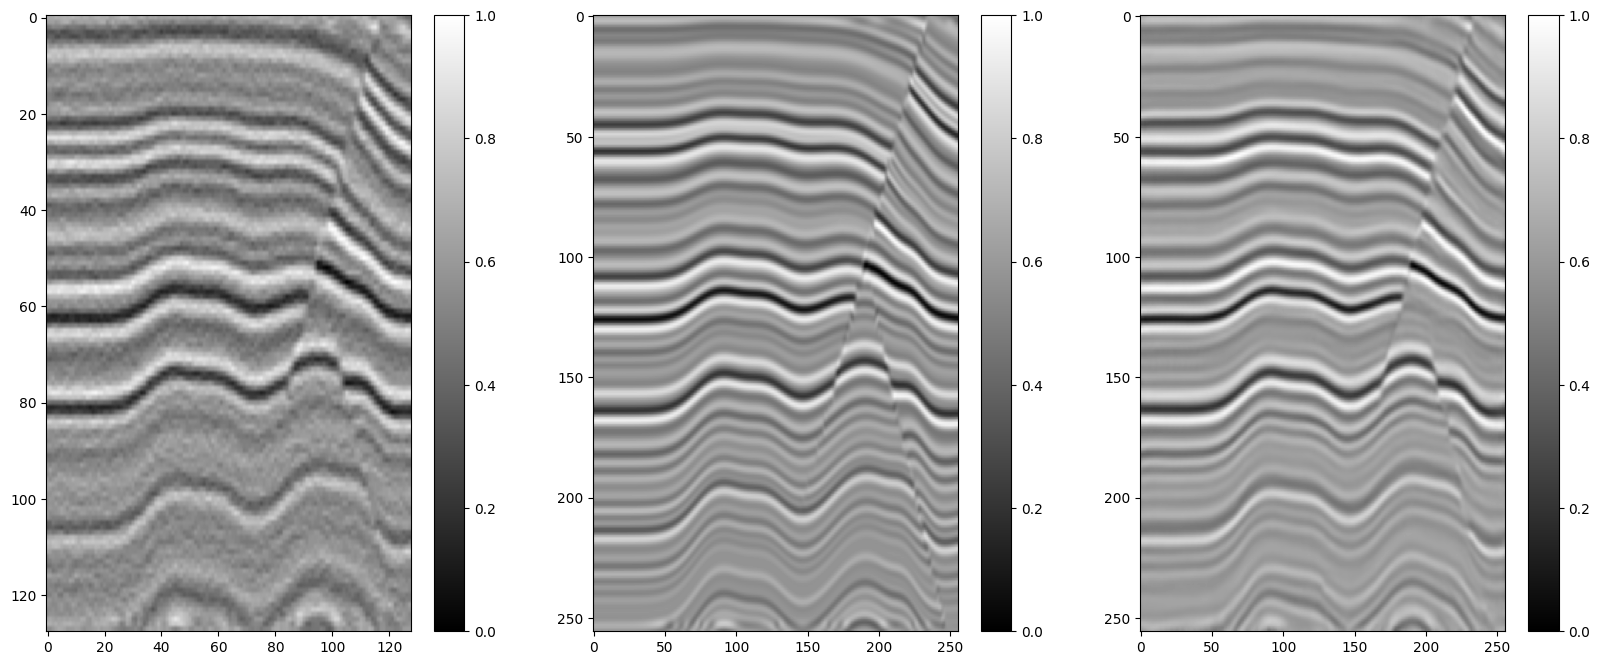

In [13]:
image = testset.reshape(-1,1,128,128)
image = torch.tensor(image, dtype=torch.float).to(device)
output = model(image)
output = output.detach().cpu().numpy()
output = output[:,0,:,:]
output = Normalization(output)

# Plotting the results.
fig = plt.figure(figsize=(20,8))
plt.subplot(1,3,1),plt.imshow(testset[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,3,2),plt.imshow(label_test[0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,3,3),plt.imshow(output[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

# Testing Phase (Synthetic Data).


In [145]:
import math
from skimage.metrics import structural_similarity as ssim
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) 
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)

#compute_psnr(datlab[k,0,:,:],pred), ssim(datlab[k,0,:,:],pred)
compute_psnr(label_test[0,:,:],output[0]), ssim(label_test[0,:,:],output[0])

(27.491066140705133, 0.9098752508893013)

In [26]:
output_mse = output[0]

Average PSNR, SSIM

In [10]:
palab = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test/image_SRF_2/*')
pain = glob.glob('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/*')#
print('len = ',len(palab))

datin = []
datlab = []
for k in range(len(palab)):

    sampleNO = palab[k].split('x2')[0].split('/')[-1]

    pain = '/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/synthetic_test_LR/x2/' + str(sampleNO)
    datin.append(np.load(pain))
    datlab.append(np.load(palab[k]))


datin = np.array(datin)
datlab = np.array(datlab)

print(datin.shape)

len =  100
(100, 1, 128, 128)


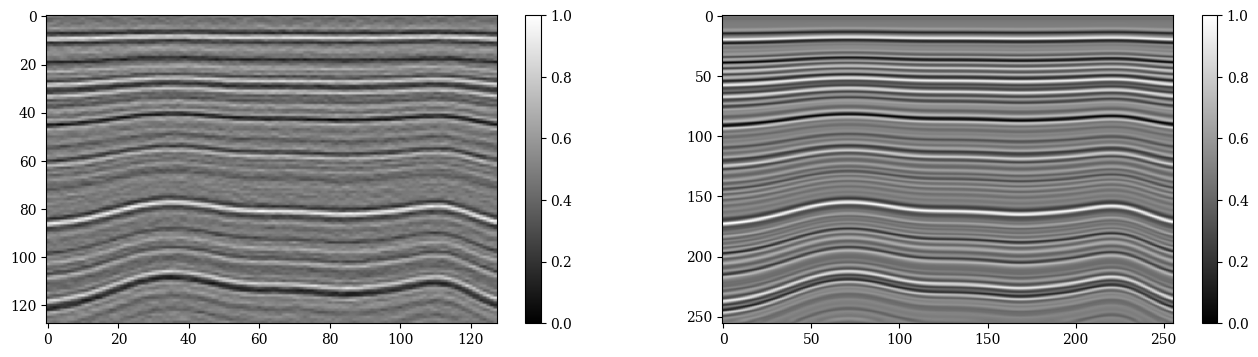

(100, 1, 128, 128)

In [17]:
k = 10

fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1),plt.imshow(datin[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.subplot(1,2,2),plt.imshow(datlab[k,0,:,:],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 

plt.show() 

np.shape(datin)

In [18]:
import math
from skimage.metrics import structural_similarity as ssim
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) 
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)
psnr_li = []
ssim_li = []



n=0
for i in range(len(datin)):

    img = datin[i]
    img = img[np.newaxis,...]
    img = torch.tensor(img, dtype=torch.float).to(device)
    output = model(img)
    output = Normalization(output)
    output = output.detach().cpu().numpy()
    output = output[:,0,:,:]

    psnr1 = compute_psnr(datlab[i,0,:,:],output[0,:,:])
    ssim1 = ssim(datlab[i,0,:,:],output[0,:,:])
    psnr_li.append(psnr1)
    ssim_li.append(ssim1)
    n+=1
print(n)
psnr_avg = sum(psnr_li)/len(psnr_li)
ssim_avg = sum(ssim_li)/len(ssim_li)

print('psnr avg: ',psnr_avg ,'ssim avg: ', ssim_avg)

100
psnr avg:  27.90341836663948 ssim avg:  0.9522882099490353


# Testing Phase (Field Data).

In [18]:
# Loading Filed Data
FieldTest = np.fromfile('/home/jbgpl/Downloads/SR_denoising/ESRT/Test_Datasets/field/lulia_592x400.dat',dtype='float32').reshape(-1,400).T
FieldTest = normalize_to_minus_one_one(FieldTest)
FieldTest = FieldTest[np.newaxis,...]


device = 'cuda' if torch.cuda.is_available() else 'cpu'



In [19]:

l1 = 96
l2 = 96
o11 = 16
o22 = 16

# Patches

image = yc_patch(FieldTest[0],l1,l2,o11,o22)
print(image.shape)
image = image.reshape(-1,1,l1,l1)

print(image.shape)
outputs = []

# Predict each patc using the ESRT.
for i in range(len(image)):
    img = Normalization(image[i])
    img = img[np.newaxis,...]
    img = torch.tensor(img, dtype=torch.float).to(device)
    output = model(img)
    output = output.detach().cpu().numpy()
    output = min_max_scaling(image[i],output)
    
    outputs.append(output)

    # Unpatching
outputs = np.array(outputs)
outputs = outputs.reshape(len(outputs),-1)
l1 = l1*2
l2 = l2*2
o1 = o11*2
o2 = o22*2
out = outputs.T
n1,n2 = FieldTest[0].shape
n1 = n1*2
n2 = n2*2
final_output = yc_patch_inv(out,n1,n2,l1,l2,o1,o2) # The reconstructed data.

#final_output = zoom(output, 0.5, order=5)
print(final_output.shape)
# Plotting the results.


(640, 9216)
(640, 1, 96, 96)
(800, 1184)


Text(0.5, 1.0, 'ESRT')

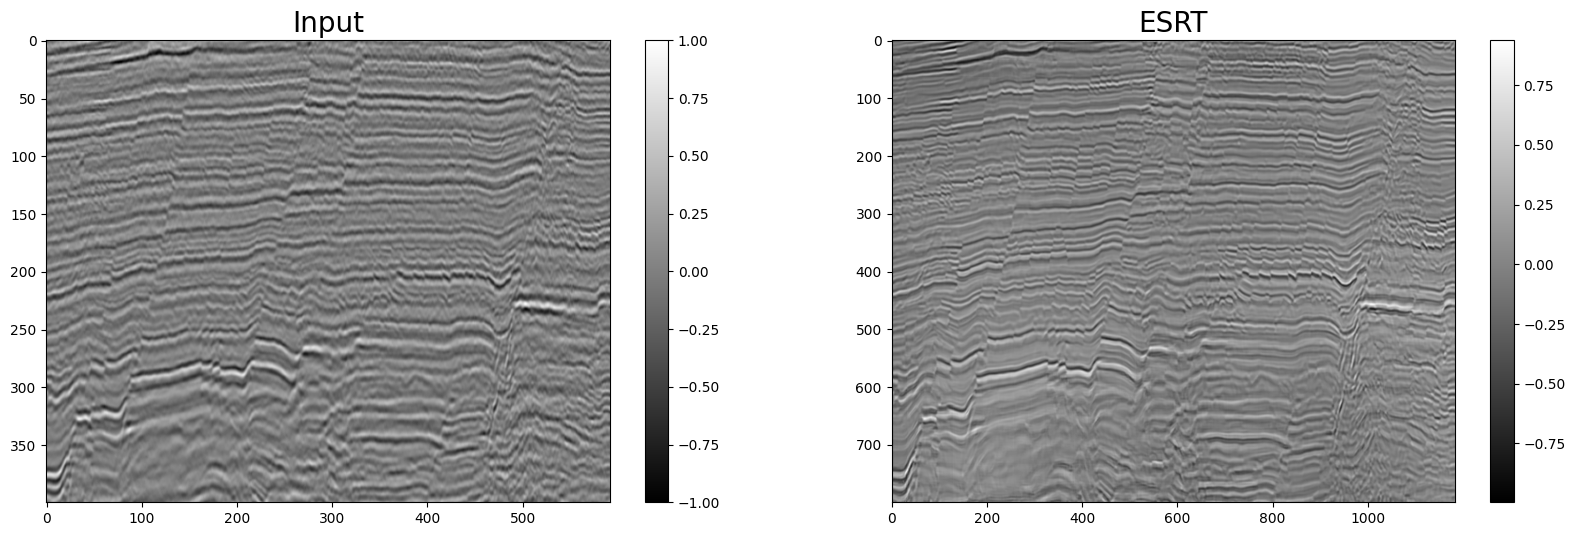

In [20]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1),plt.imshow(FieldTest[0],aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('Input', fontsize=20)
plt.subplot(1,2,2),plt.imshow(final_output,aspect='auto',cmap='gray')
plt.colorbar(label="", orientation="vertical") 
plt.title('ESRT', fontsize=20)
